# Import Training Data and saved data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
# group = pd.read_csv('Group_xx.csv') # format of output
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
validation_raw = pd.read_csv('validation.csv')

In [3]:
len(validation_raw), len(test_raw)

(303925, 303375)

# Constant bidding

In [4]:
def evaluate_const_bidding(const_bid_price_kfen, budget_kfen, df):
    
    market_price = df['payprice']
    if_click = df['click']
    total_click = 0
    total_impre = 0
    cost_kfen = 0
    
    for market_price_kfen,click in df[['payprice', 'click']].values:
        
        if const_bid_price_kfen > market_price_kfen:
            # win the bid
            total_click += click
            total_impre += 1
            cost_kfen += market_price_kfen
        
            if cost_kfen >= budget_kfen :
                break
    
    # evaluate performance
    if total_impre >0:
        CTR = (100*total_click / total_impre).round(4).astype(str)
        CPM_fen = (cost_kfen/total_impre).round(2).astype(str)
    else:
        CTR = 'inf'
        CPM_fen = 'inf'
    
    if total_click >0:
        CPC_kfen = (cost_kfen/total_click).round(2).astype(str)
    else:
        CPC_kfen = 'inf'
    
    return [total_impre, cost_kfen, total_click, CTR, CPM_fen, CPC_kfen]

# evaluate_const_bidding(2, 6250000, validation_raw)

In [5]:
# validation set has roughly the same but smaller number of bids than in the testing set
const_range = np.arange(0, max(validation_raw['payprice'])+5, 5)
total_impre, total_click, total_cost, CTR_percent, CPM_fen, CPC_kfen = [],[],[],[],[],[]

for const in const_range:

    impre, cost, click, CTR, CPM, CPC = evaluate_const_bidding(const, 6250000, validation_raw)
    total_impre.append(impre)
    total_click.append(click)
    total_cost.append(cost)
    CTR_percent.append(CTR)
    CPM_fen.append(CPM)
    CPC_kfen.append(CPC)
    

In [6]:
def plot_(x,y, ax, xlabel, ylabel):    
    plt.plot( x, y, 'g')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ylabel = len(x)*[' ']
    for i in range(len(ylabel)):
        if i % 10 ==0:
            ylabel[i] = y[i]
    ax.axes.yaxis.set_ticklabels(ylabel)
#     plt.title('CTR against different constant bidding price', fontsize = 18)
    fig.set_size_inches(5,10)



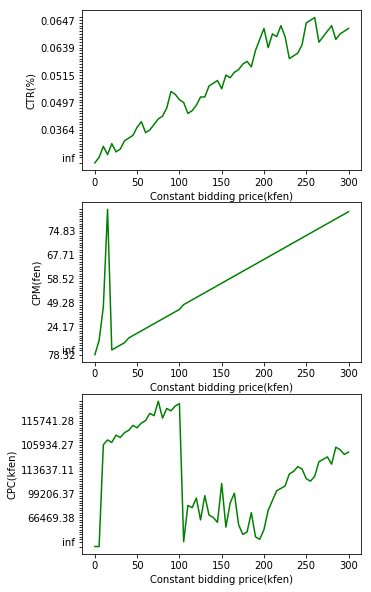

In [7]:
# draw CTR distribution against different constant
fig = plt.figure(figsize=(16,20))

ax1 = plt.subplot2grid( (3,1), (0,0))
plot_(const_range, CTR_percent, ax1, 'Constant bidding price(kfen)', 'CTR(%)')

ax2 = plt.subplot2grid( (3,1), (1,0))
plot_(const_range, CPM_fen, ax2, 'Constant bidding price(kfen)', 'CPM(fen)')

ax3 = plt.subplot2grid( (3,1), (2,0))
plot_(const_range, CPC_kfen,ax3, 'Constant bidding price(kfen)', 'CPC(kfen)')

In [8]:
CTR_percent_float = [float(p) for p in CTR_percent if p != 'inf']
print('max CTR:', max(CTR_percent_float))
optimal_const = const_range[CTR_percent_float.index(max(CTR_percent_float)) +1] # as inf is discarded
print('optimal const:', optimal_const)

max CTR: 0.0654
optimal const: 260


# Random Bidding

In [9]:
import random

def evaluate_random_bidding(bid_price_up_bound, budget_kfen, df):
    
    market_price = df['payprice']
    if_click = df['click']
    total_click = 0
    total_impre = 0
    cost_kfen = 0
    
    for market_price_kfen,click in df[['payprice', 'click']].values:
        
        random_bid_price_kfen = bid_price_up_bound * random.random()
        
        if random_bid_price_kfen > market_price_kfen:
            # win the bid
            total_click += click
            total_impre += 1
            cost_kfen += market_price_kfen
        
            if cost_kfen >= budget_kfen :
                break
    
    # evaluate performance
    if total_impre >0:
        CTR = (100*total_click / total_impre).round(4).astype(str)
        CPM_fen = (cost_kfen/total_impre).round(2).astype(str)
    else:
        CTR = 'inf'
        CPM_fen = 'inf'
    
    if total_click >0:
        CPC_kfen = (cost_kfen/total_click).round(2).astype(str)
    else:
        CPC_kfen = 'inf'
    
    return [total_impre, cost_kfen, total_click, CTR, CPM_fen, CPC_kfen]


In [10]:
# validation set has roughly the same but smaller number of bids than in the testing set
random_range = np.arange(0, max(validation_raw['payprice'])+5, 5)
total_impre, total_click, total_cost, CTR_percent, CPM_fen, CPC_kfen = [],[],[],[],[],[]

for rand in random_range:

    impre, cost, click, CTR, CPM, CPC = evaluate_random_bidding(rand, 6250000, validation_raw)
    total_impre.append(impre)
    total_click.append(click)
    total_cost.append(cost)
    CTR_percent.append(CTR)
    CPM_fen.append(CPM)
    CPC_kfen.append(CPC)
    

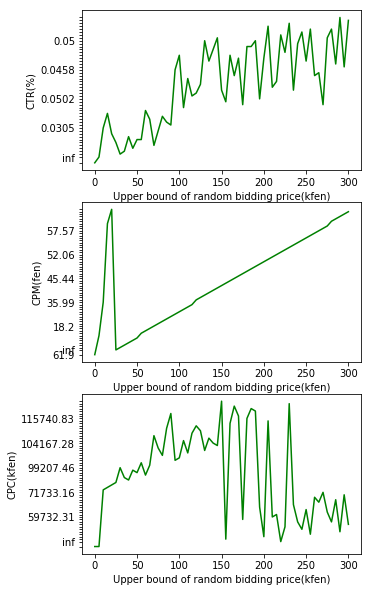

In [11]:
# draw CTR distribution against different constant
fig = plt.figure(figsize=(16,20))

ax1 = plt.subplot2grid( (3,1), (0,0))
plot_(random_range, CTR_percent, ax1, 'Upper bound of random bidding price(kfen)', 'CTR(%)')

ax2 = plt.subplot2grid( (3,1), (1,0))
plot_(random_range, CPM_fen, ax2, 'Upper bound of random bidding price(kfen)', 'CPM(fen)')

ax3 = plt.subplot2grid( (3,1), (2,0))
plot_(random_range, CPC_kfen,ax3, 'Upper bound of random bidding price(kfen)', 'CPC(kfen)')